In [2]:
import scqubits as scq


fluxonium = scq.Fluxonium(EJ = 8.9,
                               EC = 2.5,
                               EL = 0.5,
                               flux = 0.33,
                               cutoff = 110)


Here are some basic functions for accessing maths stuff about the qubit


In [3]:
#fluxonium.hamiltonian()
#fluxonium.eigenvals()
#fluxonium.eigensys()

Calculates the eigensystem for the fluxonium over a ranging parameter

In [4]:
import numpy as np
flux_list = np.linspace(-2, 2, 220)
fluxonium.get_spectrum_vs_paramvals('flux',flux_list)


Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

Getting and plotting the wavefunction (changing $E_J$)

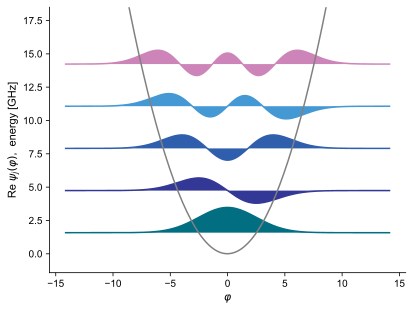

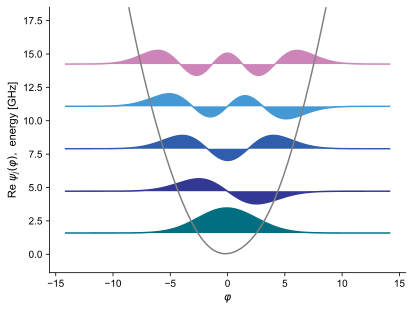

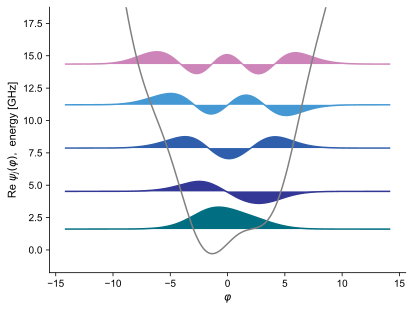

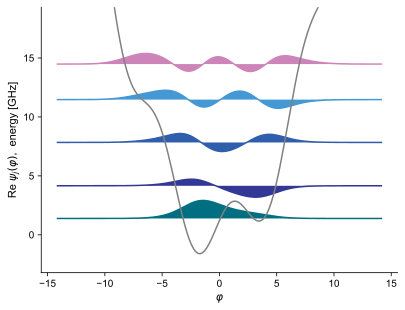

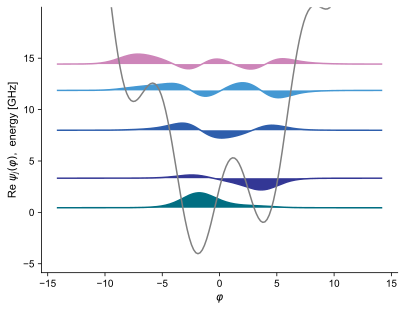

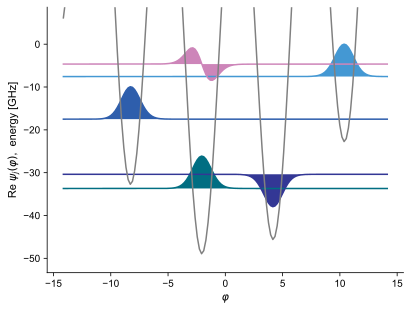

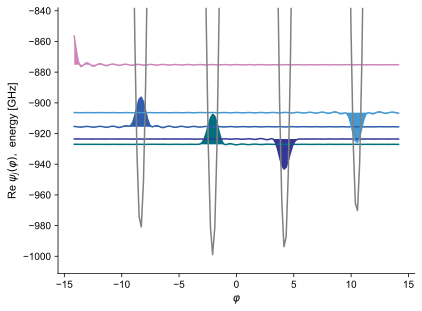

In [5]:
fluxonium.wavefunction(esys=None)

#ranging from EJ << EL to EJ >> EL

for E in [0.01,0.1,1,2.5,5,50,1000]:
    fluxonium = scq.Fluxonium(EJ = E,
                                EC = 2.5,
                                EL = 0.5,
                                flux = 0.33,
                                cutoff = 110)
    fluxonium.plot_wavefunction(esys=None,which=[0,1,2,3,4])

More plotting, but now fiddling with $E_C$

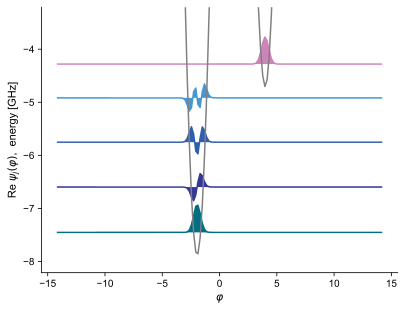

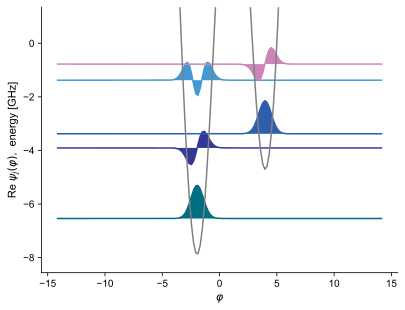

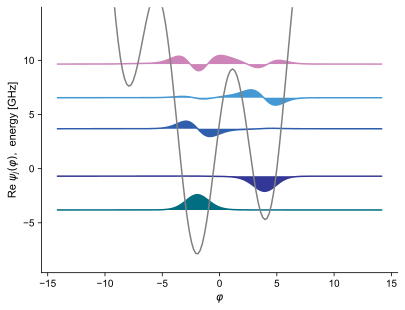

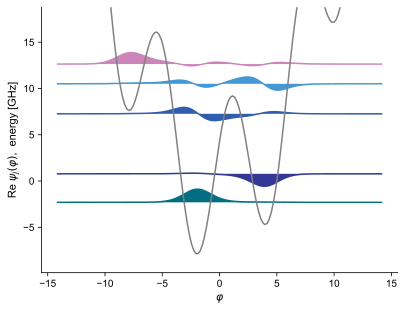

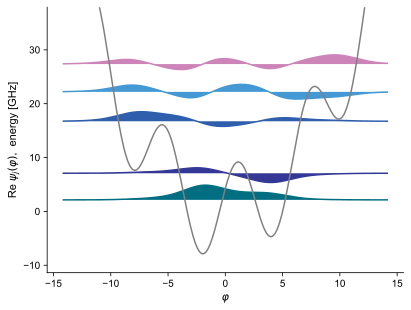

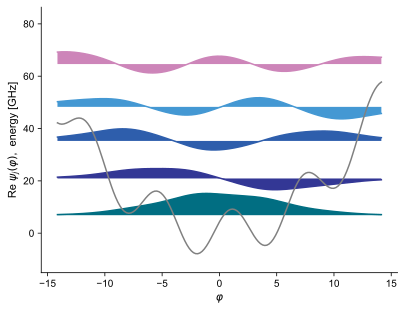

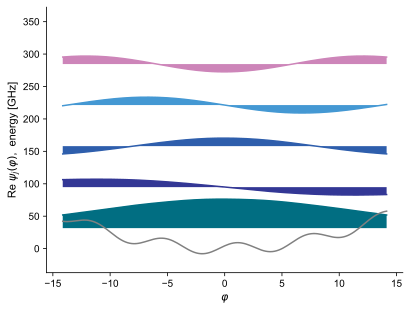

In [6]:
fluxonium.wavefunction(esys=None)

#ranging from EJ << EL to EJ >> EL

for E in [0.01,0.1,1,2,10,50,1000]:
    fluxonium = scq.Fluxonium(EJ = 8.9,
                                EC = E,
                                EL = 0.5,
                                flux = 0.33,
                                cutoff = 110)
    fluxonium.plot_wavefunction(esys=None,which=[0,1,2,3,4])

More plotting, now with $E_L$ changing

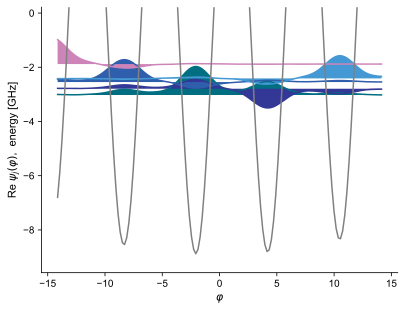

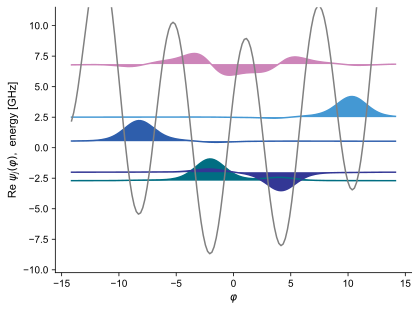

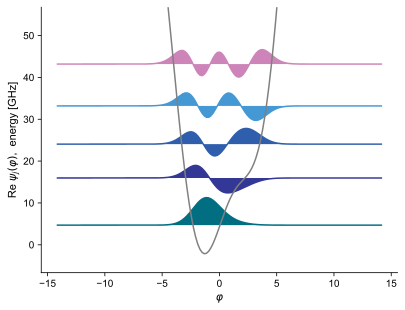

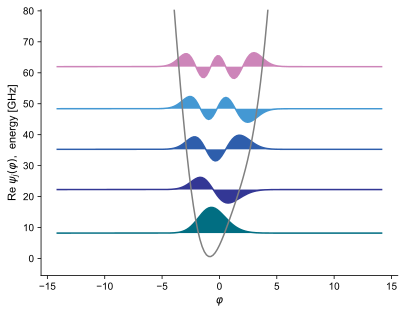

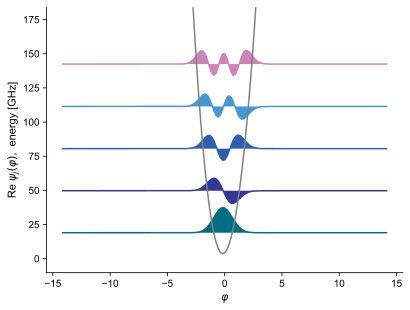

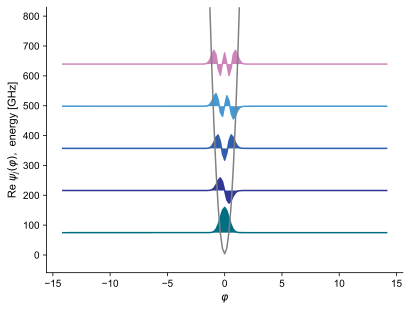

In [7]:
fluxonium.wavefunction(esys=None)

#ranging from EJ << EL to EJ >> EL

for E in [0.01,0.1,5,10,50,1000]:
    fluxonium = scq.Fluxonium(EJ = 8.9,
                                EC = 2.5,
                                EL = E,
                                flux = 0.33,
                                cutoff = 110)
    fluxonium.plot_wavefunction(esys=None,which=[0,1,2,3,4])

In [8]:
fluxonium.effective_noise_channels()

['tphi_1_over_f_cc',
 'tphi_1_over_f_flux',
 't1_capacitive',
 't1_flux_bias_line',
 't1_inductive',
 't1_quasiparticle_tunneling']

Coherence times against the energy parameters

In [4]:
#PLOTS

import scqubits as scq

#define the qubit - except for the parameters you change, these will stay constant throughout
fluxonium = scq.Fluxonium(EJ = 8.9,
                               EC = 2.5,
                               EL = 0.5,
                               flux = 0.5,
                               cutoff = 110)

import numpy as np
import matplotlib.pyplot as plt

EC = np.linspace(0.1,10,20) #EC range
EJ = np.linspace(1,20,20) #EJ range
EL = np.linspace(0.5,10,20) #EL range






phi_matrix_element = []
n_matrix_element = []

T2_3D = []
T1_3D = []
Tphi_3D = []
#n_matrix_3D = []
#phi_matrix_3D = []


for i in range(len(EC)):
    fluxonium.EC = EC[i]
    
    #clear these each time
    T1_2D = [] 
    T2_2D = [] 
    Tphi_2D = []
    #phi_matrix_2D = []
    #n_matrix_2D = []
    
    for j in range(len(EJ)):
        fluxonium.EJ = EJ[j]

        T1 = [] 
        T2 = [] 
        Tphi = []
        #phi_matrix_elemnt = []
        #n_matrix_element = []

        for k in range(len(EL)):
            fluxonium.EL = EL[k]
        
            T1.append(fluxonium.t1_effective(noise_channels=None)/1000) #this is in nanoseconds, so 1000 converts to microseconds
            T2.append(fluxonium.t2_effective(noise_channels=None)/1000)
            Tphi.append(fluxonium.t2_effective(noise_channels=["tphi_1_over_f_cc","tphi_1_over_f_flux"])/1000)

        T2_2D.append(T2)
        T1_2D.append(T1)
        Tphi_2D.append(Tphi)
    
    T2_3D.append(T2_2D)
    T1_3D.append(T1_2D)
    Tphi_3D.append(Tphi_2D)



See documentation for details.
This warning can be disabled by executing:
scqubits.settings.T1_DEFAULT_WARNING=False

 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-packages\scqubits\core\noise.py: 1195RuntimeWarning: divide by zero encountered in double_scalars
 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-packages\scqubits\core\noise.py: 1290RuntimeWarning: divide by zero encountered in double_scalars
 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-packages\scqubits\core\noise.py: 1307RuntimeWarning: invalid value encountered in double_scalars
 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-packages\scqubits\core\noise.py: 1303RuntimeWarning: divide by zero encountered in double_scalars
 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-packages\scqubits\core\noise.py: 1458RuntimeWarning: invalid value encountered in double_scalars
 c:\Users\dicid\AppData\Local\Programs\Python\Python310\lib\site-pack

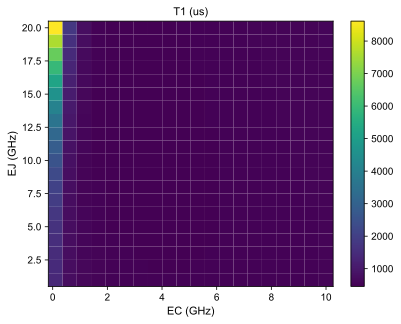

In [12]:
import numpy as np
import matplotlib.pyplot as plt

EC = np.linspace(0.1,10,20) #EC range
EJ = np.linspace(1,20,20) #EJ range
EL = np.linspace(0.5,10,20) #EL range

#plotting T2 (T2 combines T1 and T_phi)
'''
ax = []
f = []
for i in range(0,1):
    f.append(plt.figure())
    ax.append(f[i].add_subplot(111))
    ax[i].pcolormesh(EC, EJ, T2_3D[i])
    plt.xlabel("EC (GHz)")
    plt.ylabel("EJ (GHz)")
    plt.title("T2 (us)")
    plt.colorbar(orientation='vertical')
plt.show()
'''

plt.pcolormesh(EJ, EL, Tphi_3D[19])
plt.xlabel("EJ (GHz)")
plt.ylabel("EL (GHz)")
plt.title("T1 (us)")
plt.colorbar(orientation='vertical')

In [3]:
import pickle
pickle.dump(T2_3D,open("T2_3D_phi=0.5",'wb'))
pickle.dump(T1_3D,open("T1_3D_phi=0.5",'wb'))
pickle.dump(Tphi_3D,open("Tphi_3D_phi=0.5",'wb'))

In [2]:
import pickle
T2_3D = pickle.load(open("T2_3D_phi=0",'rb'))
T1_3D = pickle.load(open("T1_3D_phi=0",'rb'))
Tphi_3D = pickle.load(open("Tphi_3D_phi=0",'rb'))

In [3]:
from mayavi import mlab
mlab.volume_slice(Tphi_3D, plane_orientation='x_axes')
axes = mlab.axes(xlabel='EC', ylabel='EJ', zlabel='EL')
#mlab.axes()
mlab.show()

In [2]:
import scqubits as scq
scq.GUI()

Output(layout=Layout(width='100%'))